In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk.sentiment
import re
import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv('spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

What are the most common words + phrases in the entire dataset, spam messages, and ham messages?

In [5]:
all_words = clean(' '.join(df.text))
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

In [6]:
all_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 '150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'cus

Text(0.5, 0, 'Number of occurances')

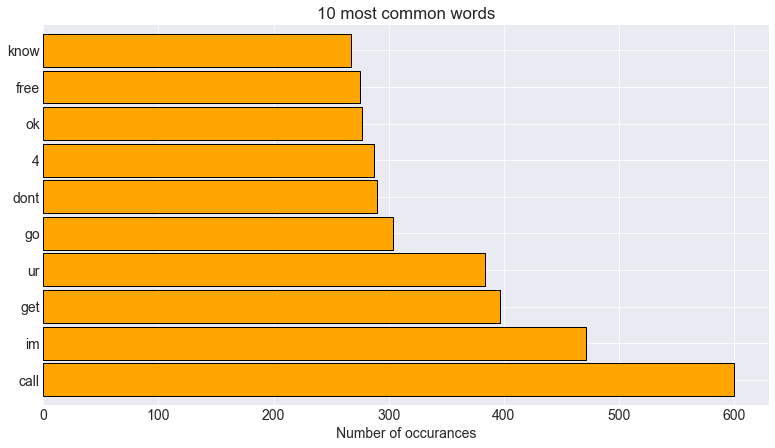

In [7]:
pd.Series(all_words).value_counts().head(10).plot.barh(width=.9, ec='black', color='orange', title='10 most common words')
plt.xlabel('Number of occurances')

In [8]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [9]:
spam_freq

call        359
free        216
txt         150
ur          144
text        137
           ... 
psp           1
8800          1
bringing      1
tel           1
no434         1
Length: 2783, dtype: int64

In [10]:
ham_freq

im          458
get         314
go          273
ok          272
dont        268
           ... 
renewal       1
radiator      1
tiring        1
massage       1
southern      1
Length: 6935, dtype: int64

In [11]:
word_counts = pd.concat([
    all_freq,
    ham_freq,
    spam_freq,
], axis=1)
word_counts = word_counts.fillna(0).astype(int)
word_counts.columns = ['all', 'ham', 'spam']
word_counts

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
...,...,...,...
zoe,2,1,1
zogtorius,1,1,0
zoom,1,1,0
zouk,1,0,1


In [12]:
word_counts.spam.sort_values().tail(20)

week        62
cash        62
urgent      63
nokia       65
send        67
new         69
service     72
tone        73
get         83
prize       94
reply      102
stop       113
claim      115
4          119
mobile     135
text       137
ur         144
txt        150
free       216
call       359
Name: spam, dtype: int64

In [13]:
word_counts.ham.sort_values().tail(20)

4       168
one     170
need    171
want    183
love    193
time    213
day     214
good    223
got     231
like    232
ur      240
ill     240
know    241
call    241
come    242
dont    268
ok      272
go      273
get     314
im      458
Name: ham, dtype: int64

In [14]:
pd.Series(nltk.bigrams(all_words)).value_counts()

(please, call)           53
(call, later)            52
(ill, call)              48
(let, know)              42
(sorry, ill)             39
                         ..
(like, everyone)          1
(either, idea)            1
(day, po)                 1
(congratulation, ore)     1
(biola, _)                1
Length: 37441, dtype: int64

2. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

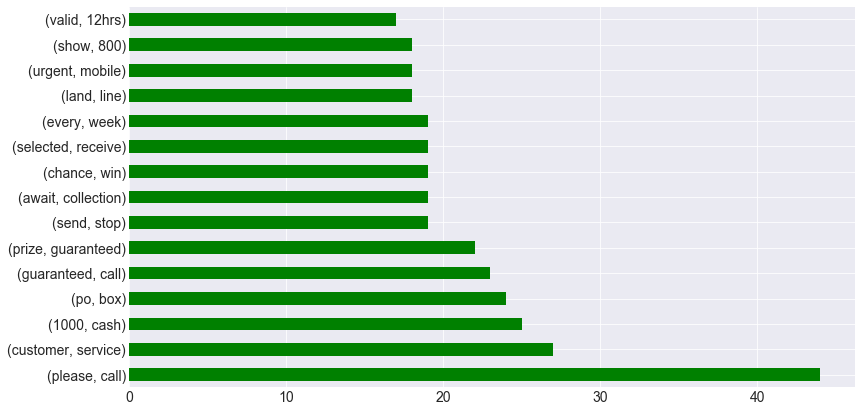

In [15]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(15).plot.barh(color='green')

In [18]:
from wordcloud import WordCloud

text = ' '.join(spam_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

ModuleNotFoundError: No module named 'wordcloud'

In [19]:
text = ' '.join(ham_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

NameError: name 'WordCloud' is not defined

3. Is there any overlap in the bigrams for the spam data and the ham data?

In [ ]:
s1 = pd.Series(nltk.bigrams(ham_words))
s1

In [ ]:
s2 = pd.Series(nltk.bigrams(spam_words))
s2

In [ ]:
bigrams = pd.concat([s1,s2,], axis=1)
bigrams.columns = ['ham', 'spam']
bigrams

In [ ]:
bigrams[bigrams.ham == bigrams.spam]

Looks like there's no overlap of bigrams for the spam data and the ham data

3. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [ ]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

- Are there any words that uniquely identify a spam or ham message?

In [ ]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()

In [ ]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

In [ ]:
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(6)])

In [ ]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

In [ ]:
(word_counts
 [(word_counts.spam > 10) & (word_counts.ham > 10)]
 .assign(ratio=lambda df: df.spam / (df.ham + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

In [ ]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

In [ ]:
pd.Series(nltk.trigrams(all_words)).value_counts()

In [ ]:
pd.Series(nltk.trigrams(ham_words)).value_counts()

In [ ]:
pd.Series(nltk.trigrams(ham_words)).value_counts().head(10).plot.barh(color='green')

In [ ]:
pd.Series(nltk.trigrams(spam_words)).value_counts()

In [ ]:
pd.Series(nltk.trigrams(spam_words)).value_counts().head(10).plot.barh(color='orange')

2. Explore the blog articles using the techniques discussed in the exploration lesson

In [ ]:
import prepare 

In [ ]:
df = prepare.prep_blog_articles()
df

What are the most common words + phrases in the entire dataset?

In [ ]:
all_words = clean(' '.join(df.clean_lemmatized))
len(all_words)

In [ ]:
pd.Series(all_words).value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most common words')
plt.xlabel('Number of occurances')

In [ ]:
text = ' '.join(all_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

### Other Common Features
    Domain Specific
    character count
    word count
    sentence count

In [ ]:
df['ch_count'] = df.clean_lemmatized.apply(len)

In [ ]:
df['word_count'] = df.clean_lemmatized.apply(clean).apply(len)

In [ ]:
df['sentence_count'] = df.clean_lemmatized.apply(nltk.sent_tokenize).apply(len)

In [ ]:
sns.relplot(data=df, y='word_count', x='ch_count', hue='title')

In [ ]:
df.groupby('title').median()

### Sentiment Analysis
    Is this text generally positive or generally negative?
    Statistical + knowledge based approach
    Vader Sentiment Analyzer: purpose built for social media
    afinn

In [ ]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('Today is a awesome day!')

In [ ]:
sia.polarity_scores('It is great!')

In [ ]:
sia.polarity_scores('Would you like go and eat something?')

In [ ]:
df['sentiment'] = df.clean_lemmatized.apply(lambda word: sia.polarity_scores(word)['compound'])

In [ ]:
df.groupby('title').sentiment.mean()

In [ ]:
sns.relplot(data=df, x='word_count', y='sentiment', hue='title')

In [ ]:
df['multisentence'] = df.sentence_count > 1

In [ ]:
df.groupby(['title', 'multisentence']).sentiment.describe()

In [ ]:
df